In [2]:
import pandas as pd
import json
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.genmod.bayes_mixed_glm as smgb
import matplotlib.ticker as mtick
%matplotlib inline

In [19]:
df = pd.read_csv('merged1.csv', low_memory=False)
df.tail()

,id,user_id,user_condition,inline_survey_angry,inline_survey_excited,inline_survey_calm,inline_survey_sad,detected_nervous,detected_sad,detected_happy,...,pre_survey_tired,pre_survey_fearful,pre_survey_aroused,pre_survey_excited,pre_survey_bored,pre_survey_angry,LAN,HAN,LAP,HAP
12137,1826156311760748753,970D4EEC947843748CC850F6B6549E96,I_T,NaN,NaN,13.0,28.0,1,3,1,...,2,2,3,2,2,3,1,1,0,1
12138,1826590217886953644,970D4EEC947843748CC850F6B6549E96,I_T,13.0,NaN,32.0,NaN,2,1,1,...,2,2,3,2,2,3,0,1,0,1
12139,1826396363422408995,970D4EEC947843748CC850F6B6549E96,I_T,NaN,NaN,16.0,26.0,1,1,4,...,2,2,3,2,2,3,0,0,0,1
12140,1826888306262426013,777BB7E5A73F452EAD8F67E76D24AAD7,I_C,24.0,49.0,NaN,NaN,1,1,5,...,2,2,3,3,2,3,0,0,1,1
12141,1826786088867786994,970D4EEC947843748CC850F6B6549E96,I_T,7.0,NaN,46.0,NaN,1,1,1,...,2,2,3,2,2,3,0,1,0,1


In [17]:
df = pd.read_csv('joint_data.csv', low_memory=False)
df.tail()

,id,user_id,user_condition,NEU,LAN,HAN,LAP,HAP,inline_survey_sad,inline_survey_angry,...,pre_survey_nervous,pre_survey_satisfied,pre_survey_calm,pre_survey_relaxed,pre_survey_tired,pre_survey_fearful,pre_survey_aroused,pre_survey_excited,pre_survey_bored,pre_survey_angry
12073,1826156311760748753,970D4EEC947843748CC850F6B6549E96,I_T,0,0,1,0,0,28.0,NaN,...,1,2,1,1,2,2,3,2,2,3
12074,1826590217886953644,970D4EEC947843748CC850F6B6549E96,I_T,0,0,1,0,0,NaN,13.0,...,1,2,1,1,2,2,3,2,2,3
12075,1826396363422408995,970D4EEC947843748CC850F6B6549E96,I_T,0,0,0,0,1,26.0,NaN,...,1,2,1,1,2,2,3,2,2,3
12076,1826888306262426013,777BB7E5A73F452EAD8F67E76D24AAD7,I_C,0,0,0,0,1,NaN,24.0,...,3,3,2,2,2,2,3,3,2,3
12077,1826786088867786994,970D4EEC947843748CC850F6B6549E96,I_T,0,0,1,0,0,NaN,7.0,...,1,2,1,1,2,2,3,2,2,3


In [42]:
df = df[df['user_condition'] == 'I_C']
df.tail()

,id,user_id,user_condition,inline_survey_angry,inline_survey_excited,inline_survey_calm,inline_survey_sad,detected_nervous,detected_sad,detected_happy,...,HAN,LAP,HAP,binary_female,var_age,var_ladder,var_pre_survey_angry,var_pre_survey_sad,var_pre_survey_excited,var_pre_survey_calm
12133,1826167774168621388,2F7CD4FAA3B14AF6906C5BBA8910BE40,I_C,NaN,NaN,46.0,27.0,2,1,4,...,1,1,1,0,-1.875592,2.014001,-0.336717,-0.158672,0.532145,-0.069277
12134,1826484820006068726,777BB7E5A73F452EAD8F67E76D24AAD7,I_C,NaN,48.0,NaN,3.0,1,2,4,...,0,1,1,1,-1.296318,2.014001,0.665347,-0.158672,0.532145,-0.992619
12135,1826635514088157642,51327BCE33CA45CE9863D7D0DE619E6D,I_C,NaN,NaN,50.0,47.0,1,1,4,...,0,1,1,0,-1.296318,0.014001,0.665347,0.876022,-0.417070,-0.069277
12136,1826635554223501553,2F7CD4FAA3B14AF6906C5BBA8910BE40,I_C,NaN,NaN,NaN,36.0,2,1,2,...,1,0,1,0,-1.875592,2.014001,-0.336717,-0.158672,0.532145,-0.069277
12140,1826888306262426013,777BB7E5A73F452EAD8F67E76D24AAD7,I_C,24.0,49.0,NaN,NaN,1,1,5,...,0,1,1,1,-1.296318,2.014001,0.665347,-0.158672,0.532145,-0.992619


In [43]:
df.describe()

,id,inline_survey_angry,inline_survey_excited,inline_survey_calm,inline_survey_sad,detected_nervous,detected_sad,detected_happy,detected_calm,detected_excited,...,HAN,LAP,HAP,binary_female,var_age,var_ladder,var_pre_survey_angry,var_pre_survey_sad,var_pre_survey_excited,var_pre_survey_calm
count,2.836000e+03,1521.000000,1439.000000,1495.000000,1415.000000,2836.000000,2836.000000,2836.000000,2836.000000,2836.000000,...,2836.000000,2836.000000,2836.000000,2836.000000,2836.000000,2836.000000,2836.000000,2836.000000,2836.000000,2836.000000
mean,1.816911e+18,17.860618,31.637248,60.969231,19.314488,1.462976,1.420310,2.779619,1.143512,3.029972,...,0.532793,0.480606,0.894217,0.406206,-0.005692,-0.012797,0.021567,0.082853,0.060215,0.032955
std,3.290200e+15,22.432742,28.691354,26.912852,22.679849,0.787717,0.951559,1.513171,0.449413,1.189675,...,0.499011,0.499712,0.307614,0.491210,1.015094,1.689679,1.066854,1.016369,0.961850,0.941122
min,1.810144e+18,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,-1.875592,-3.985999,-1.338782,-1.193366,-1.366285,-1.915960
25%,1.814421e+18,2.000000,6.000000,46.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,0.000000,0.000000,1.000000,0.000000,-0.861862,-0.985999,-0.336717,-1.193366,-0.417070,-0.992619
50%,1.816432e+18,7.000000,25.000000,64.000000,10.000000,1.000000,1.000000,3.000000,1.000000,3.000000,...,1.000000,0.000000,1.000000,0.000000,0.007049,0.014001,-0.336717,-0.158672,-0.417070,-0.069277
75%,1.819110e+18,25.000000,50.000000,78.000000,26.000000,2.000000,1.000000,4.000000,1.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,0.803551,1.014001,0.665347,0.876022,0.532145,0.854064
max,1.826888e+18,100.000000,100.000000,100.000000,100.000000,5.000000,5.000000,5.000000,4.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,2.251736,3.014001,2.669476,2.945410,2.430576,1.777406


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12142 entries, 0 to 12141
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       12142 non-null  int64  
 1   user_id                  12142 non-null  object 
 2   user_condition           12142 non-null  object 
 3   inline_survey_angry      6471 non-null   float64
 4   inline_survey_excited    6406 non-null   float64
 5   inline_survey_calm       6523 non-null   float64
 6   inline_survey_sad        6376 non-null   float64
 7   detected_nervous         12142 non-null  int64  
 8   detected_sad             12142 non-null  int64  
 9   detected_happy           12142 non-null  int64  
 10  detected_calm            12142 non-null  int64  
 11  detected_excited         12142 non-null  int64  
 12  detected_aroused         12142 non-null  int64  
 13  detected_angry           12142 non-null  int64  
 14  detected_relaxed      

In [5]:
# detected = emo in tweet
# emo = pre survey
# survey = inline survey
df[['detected_angry','pre_survey_angry', 'inline_survey_angry']].corr()

,detected_angry,pre_survey_angry,inline_survey_angry
detected_angry,1.000000,0.003500,0.123307
pre_survey_angry,0.003500,1.000000,0.282549
inline_survey_angry,0.123307,0.282549,1.000000


In [6]:
df[['detected_sad','pre_survey_sad', 'inline_survey_sad']].corr()

,detected_sad,pre_survey_sad,inline_survey_sad
detected_sad,1.000000,-0.021596,0.043833
pre_survey_sad,-0.021596,1.000000,0.278404
inline_survey_sad,0.043833,0.278404,1.000000


In [7]:
df[['detected_calm','pre_survey_calm', 'inline_survey_calm']].corr()

,detected_calm,pre_survey_calm,inline_survey_calm
detected_calm,1.000000,-0.005157,0.017848
pre_survey_calm,-0.005157,1.000000,0.311839
inline_survey_calm,0.017848,0.311839,1.000000


In [8]:
df[['detected_excited','pre_survey_excited', 'inline_survey_excited']].corr()

,detected_excited,pre_survey_excited,inline_survey_excited
detected_excited,1.000000,0.038794,0.072564
pre_survey_excited,0.038794,1.000000,0.359148
inline_survey_excited,0.072564,0.359148,1.000000


<Axes: >

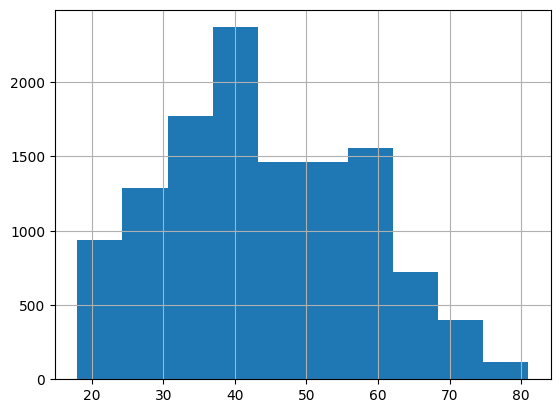

In [22]:
df['age'].hist()

In [25]:
df['ladder'].value_counts()

5                2613
6                2090
4                1956
3                1911
7                1795
2                 732
8                 628
9                 178
Bottom Rung 1     150
Top Rung 10        25
Name: ladder, dtype: int64

In [20]:
df.ladder[df.ladder == 'Bottom Rung 1'] = 1

/var/folders/76/5w1g8h3d1y53y5vcpx55tgl00000gn/T/ipykernel_18120/334600236.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.ladder[df.ladder == 'Bottom Rung 1'] = 1
/var/folders/76/5w1g8h3d1y53y5vcpx55tgl00000gn/T/ipykernel_18120/33460

In [21]:
df.ladder[df.ladder == 'Top Rung 10'] = 10

/var/folders/76/5w1g8h3d1y53y5vcpx55tgl00000gn/T/ipykernel_18120/789695446.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.ladder[df.ladder == 'Top Rung 10'] = 10
/var/folders/76/5w1g8h3d1y53y5vcpx55tgl00000gn/T/ipykernel_18120/789695

In [22]:
df['ladder'].value_counts()

ladder
5     2626
6     2105
4     1967
3     1917
7     1807
2      736
8      626
9      180
1      152
10      26
Name: count, dtype: int64

In [23]:
df['ladder'] = df['ladder'].astype('int64')

<Axes: >

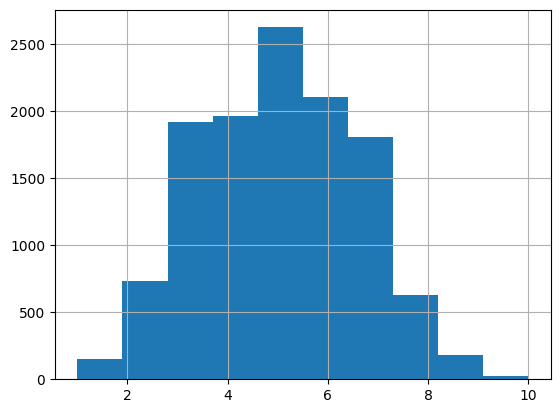

In [13]:
df['ladder'].hist()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12078 entries, 0 to 12077
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       12078 non-null  int64  
 1   user_id                  12078 non-null  object 
 2   user_condition           12078 non-null  object 
 3   NEU                      12078 non-null  int64  
 4   LAN                      12078 non-null  int64  
 5   HAN                      12078 non-null  int64  
 6   LAP                      12078 non-null  int64  
 7   HAP                      12078 non-null  int64  
 8   inline_survey_sad        6334 non-null   float64
 9   inline_survey_angry      6445 non-null   float64
 10  inline_survey_calm       6492 non-null   float64
 11  inline_survey_excited    6373 non-null   float64
 12  detected_nervous         12078 non-null  int64  
 13  detected_sad             12078 non-null  int64  
 14  detected_happy        

<Axes: >

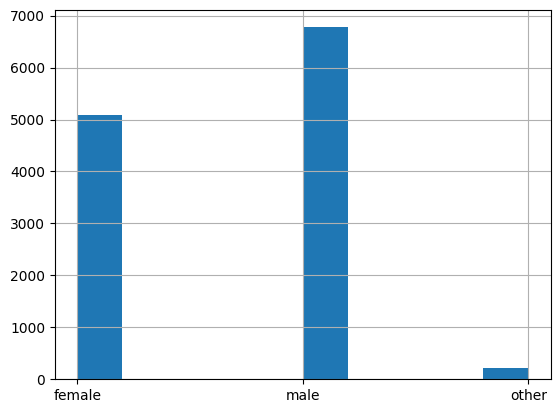

In [29]:
df['gender'].hist()

In [30]:
df['gender'].value_counts()

gender
male      6776
female    5080
other      222
Name: count, dtype: int64

In [24]:
df['binary_female'] = 0
df.binary_female[df.gender == 'female'] = 1

/var/folders/76/5w1g8h3d1y53y5vcpx55tgl00000gn/T/ipykernel_18120/2263318100.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.binary_female[df.gender == 'female'] = 1
/var/folders/76/5w1g8h3d1y53y5vcpx55tgl00000gn/T/ipykernel_18120/2263

In [25]:
df['binary_female'].value_counts()

binary_female
0    7029
1    5113
Name: count, dtype: int64

In [26]:
df[['detected_angry','pre_survey_angry', 'inline_survey_angry', 'age', 'binary_female']].corr()

,detected_angry,pre_survey_angry,inline_survey_angry,age,binary_female
detected_angry,1.000000,0.003500,0.123307,0.034063,-0.016974
pre_survey_angry,0.003500,1.000000,0.282549,-0.039228,-0.029268
inline_survey_angry,0.123307,0.282549,1.000000,0.041234,-0.060872
age,0.034063,-0.039228,0.041234,1.000000,0.083692
binary_female,-0.016974,-0.029268,-0.060872,0.083692,1.000000


array([[<Axes: title={'center': 'pre_survey_angry'}>,
        <Axes: title={'center': 'detected_angry'}>],
       [<Axes: title={'center': 'inline_survey_angry'}>, <Axes: >]],
      dtype=object)

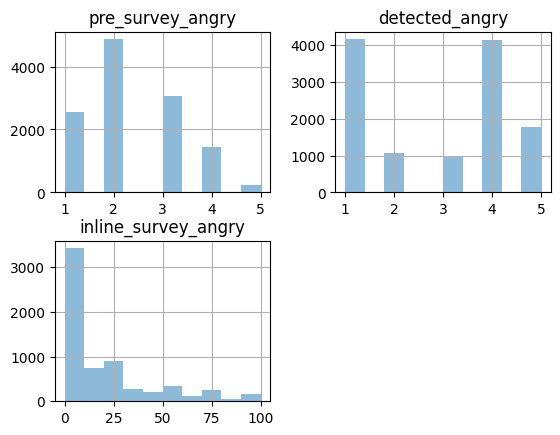

In [17]:
df[['pre_survey_angry', 'detected_angry', 'inline_survey_angry']].hist(alpha=0.5)

array([[<Axes: title={'center': 'pre_survey_excited'}>,
        <Axes: title={'center': 'detected_excited'}>],
       [<Axes: title={'center': 'inline_survey_excited'}>, <Axes: >]],
      dtype=object)

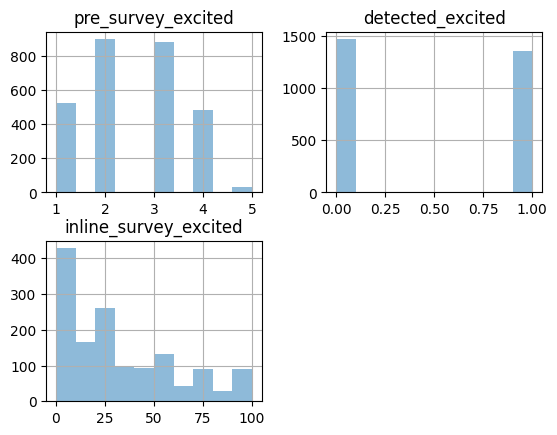

In [28]:
df[['pre_survey_excited', 'detected_excited', 'inline_survey_excited']].hist(alpha=0.5)

In [27]:
df[['inline_survey_angry', 
'detected_angry',
'HAN',
'HAP',
'LAN',
'LAP',
'pre_survey_enthusiastic', 
'pre_survey_happy', 
'pre_survey_still', 
'pre_survey_lonely',
'pre_survey_sad',
'pre_survey_nervous',
'pre_survey_satisfied',
'pre_survey_calm',
'pre_survey_relaxed',
'pre_survey_tired',
'pre_survey_fearful',
'pre_survey_aroused',
'pre_survey_excited',
'pre_survey_bored',
'pre_survey_angry'
]].corr()

# Note: the controlled group's pre survey sad / nervous / tired is more correlated with inline survey anger: 0.31 / 0.29 / 0.275
# for all data it is 0.22 / 0.20 / 0.16


,inline_survey_angry,detected_angry,HAN,HAP,LAN,LAP,pre_survey_enthusiastic,pre_survey_happy,pre_survey_still,pre_survey_lonely,...,pre_survey_nervous,pre_survey_satisfied,pre_survey_calm,pre_survey_relaxed,pre_survey_tired,pre_survey_fearful,pre_survey_aroused,pre_survey_excited,pre_survey_bored,pre_survey_angry
inline_survey_angry,1.000000,0.123307,0.104067,-0.020317,0.017704,-0.079328,-0.088765,-0.178795,-0.129157,0.133111,...,0.200068,-0.137743,-0.209067,-0.221628,0.163605,0.247423,0.037305,-0.064376,0.047781,0.282549
detected_angry,0.123307,1.000000,0.719602,-0.208819,0.215428,-0.603623,-0.021920,-0.037577,0.005647,-0.019897,...,-0.008291,-0.036843,-0.006918,-0.021782,0.004685,0.025083,-0.016166,-0.043456,-0.004660,0.003500
HAN,0.104067,0.719602,1.000000,-0.190903,0.212276,-0.641122,-0.017768,-0.044918,0.011852,-0.012908,...,-0.007074,-0.034580,-0.013922,-0.022230,-0.004707,0.020370,-0.011496,-0.036135,0.010618,0.018439
HAP,-0.020317,-0.208819,-0.190903,1.000000,-0.373890,0.241147,-0.001025,0.011464,0.002414,-0.001591,...,0.028101,0.015616,-0.004831,-0.012184,0.013126,0.017678,0.002830,0.010376,-0.000419,0.012815
LAN,0.017704,0.215428,0.212276,-0.373890,1.000000,-0.250981,-0.000814,-0.012916,-0.003828,0.012502,...,-0.010047,-0.003935,-0.007444,0.013779,-0.016646,-0.003761,0.006604,-0.010641,-0.001878,-0.016987
LAP,-0.079328,-0.603623,-0.641122,0.241147,-0.250981,1.000000,0.030000,0.041915,0.002539,0.026507,...,0.028749,0.038404,0.006465,0.011902,0.016411,-0.013494,0.018801,0.036359,-0.005940,-0.014856
pre_survey_enthusiastic,-0.088765,-0.021920,-0.017768,-0.001025,-0.000814,0.030000,1.000000,0.603206,0.108544,-0.024398,...,-0.022254,0.559043,0.346575,0.375067,-0.081647,-0.008468,0.275914,0.705961,-0.204523,-0.123639
pre_survey_happy,-0.178795,-0.037577,-0.044918,0.011464,-0.012916,0.041915,0.603206,1.000000,0.180692,-0.133976,...,-0.188768,0.671622,0.526059,0.548749,-0.196706,-0.214969,0.167410,0.577953,-0.157989,-0.319765
pre_survey_still,-0.129157,0.005647,0.011852,0.002414,-0.003828,0.002539,0.108544,0.180692,1.000000,0.147902,...,-0.082584,0.186387,0.390244,0.361218,0.066110,-0.098960,0.101293,0.092457,0.122790,-0.067469
pre_survey_lonely,0.133111,-0.019897,-0.012908,-0.001591,0.012502,0.026507,-0.024398,-0.133976,0.147902,1.000000,...,0.342728,-0.081065,-0.095167,-0.078505,0.442068,0.291902,0.218020,0.077744,0.338217,0.254593


In [28]:
# Z-Score using pandas 
# https://www.geeksforgeeks.org/how-to-standardize-data-in-a-pandas-dataframe/
df['var_age'] = (df['age'] - df['age'].mean()) / df['age'].std()
df['var_age'].describe()

count    1.214200e+04
mean     1.872621e-16
std      1.000000e+00
min     -1.875592e+00
25%     -7.894529e-01
50%     -1.377696e-01
75%      8.035507e-01
max      2.686191e+00
Name: var_age, dtype: float64

In [29]:
# shift ladder to have a mean 0
df['var_ladder'] = (df['ladder'] - df['ladder'].mean())
df['var_ladder'].describe()

count    1.214200e+04
mean    -1.310835e-16
std      1.750090e+00
min     -3.985999e+00
25%     -9.859990e-01
50%      1.400099e-02
75%      1.014001e+00
max      5.014001e+00
Name: var_ladder, dtype: float64

In [30]:
df['var_pre_survey_angry'] = (df['pre_survey_angry'] - df['pre_survey_angry'].mean()) / df['pre_survey_angry'].std()
df['var_pre_survey_sad'] = (df['pre_survey_sad'] - df['pre_survey_sad'].mean()) / df['pre_survey_sad'].std()
df['var_pre_survey_excited'] = (df['pre_survey_excited'] - df['pre_survey_excited'].mean()) / df['pre_survey_excited'].std()
df['var_pre_survey_calm'] = (df['pre_survey_calm'] - df['pre_survey_calm'].mean()) / df['pre_survey_calm'].std()

In [49]:
md = smf.mixedlm("inline_survey_angry ~ var_age + binary_female + var_ladder + var_pre_survey_angry + var_pre_survey_excited + detected_angry", df, groups=df["user_id"], missing='drop')
mdf = md.fit()
print(mdf.summary())

              Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: inline_survey_angry
No. Observations:  1521    Method:             REML               
No. Groups:        240     Scale:              314.9567           
Min. group size:   1       Log-Likelihood:     -6660.4179         
Max. group size:   39      Converged:          Yes                
Mean group size:   6.3                                            
------------------------------------------------------------------
                        Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------
Intercept               17.055    1.479 11.534 0.000 14.157 19.953
var_age                  0.524    0.953  0.550 0.582 -1.344  2.392
binary_female           -2.786    1.918 -1.452 0.146 -6.545  0.973
var_ladder               0.732    0.591  1.238 0.216 -0.427  1.890
var_pre_survey_angry     6.727    0.931  7.224 0.000  4.902  8.552
var_pre_su

In [50]:
md = smf.mixedlm("inline_survey_sad ~ var_age + binary_female + var_ladder + var_pre_survey_angry + var_pre_survey_excited + detected_sad", df, groups=df["user_id"], missing='drop')
mdf = md.fit()
print(mdf.summary())

              Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  inline_survey_sad
No. Observations:  1415     Method:              REML             
No. Groups:        244      Scale:               349.1503         
Min. group size:   1        Log-Likelihood:      -6283.9544       
Max. group size:   32       Converged:           Yes              
Mean group size:   5.8                                            
------------------------------------------------------------------
                        Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------
Intercept               19.685    1.604 12.272 0.000 16.541 22.829
var_age                 -0.667    1.055 -0.632 0.527 -2.734  1.401
binary_female            0.750    2.124  0.353 0.724 -3.412  4.913
var_ladder              -1.010    0.661 -1.528 0.127 -2.306  0.286
var_pre_survey_angry     4.800    1.034  4.640 0.000  2.772  6.827
var_pre_su

In [46]:
md = smf.mixedlm("inline_survey_sad ~ var_age + binary_female + var_ladder + var_pre_survey_angry + var_pre_survey_excited + detected_sad", df, groups=df["user_id"], missing='drop')
mdf = md.fit()
print(mdf.summary())

              Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  inline_survey_sad
No. Observations:  1415     Method:              REML             
No. Groups:        244      Scale:               349.1503         
Min. group size:   1        Log-Likelihood:      -6283.9544       
Max. group size:   32       Converged:           Yes              
Mean group size:   5.8                                            
------------------------------------------------------------------
                        Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------
Intercept               19.685    1.604 12.272 0.000 16.541 22.829
var_age                 -0.667    1.055 -0.632 0.527 -2.734  1.401
binary_female            0.750    2.124  0.353 0.724 -3.412  4.913
var_ladder              -1.010    0.661 -1.528 0.127 -2.306  0.286
var_pre_survey_angry     4.800    1.034  4.640 0.000  2.772  6.827
var_pre_su

In [142]:
df.describe()

,id,NEU,LAN,HAN,LAP,HAP,inline_survey_sad,inline_survey_angry,inline_survey_calm,inline_survey_excited,...,pre_survey_excited,pre_survey_bored,pre_survey_angry,binary_female,var_age,var_ladder,var_pre_survey_angry,var_pre_survey_sad,var_pre_survey_excited,var_pre_survey_calm
count,1.207800e+04,12078.000000,12078.000000,12078.000000,12078.000000,12078.000000,6334.000000,6445.000000,6492.000000,6373.000000,...,12078.000000,12078.000000,12078.000000,12078.000000,1.207800e+04,1.207800e+04,1.207800e+04,1.207800e+04,1.207800e+04,1.207800e+04
mean,1.817168e+18,0.028813,0.030800,0.688939,0.048270,0.225534,19.970161,19.343988,59.080099,31.126628,...,2.439477,2.078407,2.335734,0.420599,-4.706360e-17,2.635562e-16,-2.070799e-16,-1.553099e-16,-1.882544e-17,-1.600162e-16
std,3.406523e+15,0.167287,0.172782,0.462947,0.214344,0.417951,24.319214,24.226464,27.891288,28.989772,...,1.054814,0.986820,0.997953,0.493676,1.000000e+00,1.749875e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,1.808642e+18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,-1.876512e+00,-3.985676e+00,-1.338475e+00,-1.192880e+00,-1.364674e+00,-1.915335e+00
25%,1.814433e+18,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,40.000000,5.000000,...,2.000000,1.000000,2.000000,0.000000,-7.902249e-01,-9.856764e-01,-3.364232e-01,-1.192880e+00,-4.166392e-01,-9.922140e-01
50%,1.816671e+18,0.000000,0.000000,1.000000,0.000000,0.000000,9.000000,8.000000,59.000000,25.000000,...,2.000000,2.000000,2.000000,0.000000,-1.384526e-01,1.432356e-02,-3.364232e-01,-1.581483e-01,-4.166392e-01,-6.909270e-02
75%,1.819792e+18,0.000000,0.000000,1.000000,0.000000,0.000000,26.000000,25.000000,78.000000,50.000000,...,3.000000,3.000000,3.000000,1.000000,8.029963e-01,1.014324e+00,6.656284e-01,8.765834e-01,5.313955e-01,8.540286e-01
max,1.826888e+18,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,100.000000,100.000000,100.000000,...,5.000000,5.000000,5.000000,1.000000,2.685894e+00,5.014324e+00,2.669732e+00,2.946047e+00,2.427465e+00,1.777150e+00


In [52]:
md = smf.mixedlm("inline_survey_excited ~ var_age + binary_female + var_ladder + var_pre_survey_angry + var_pre_survey_excited + HAP", df, groups=df["user_id"], missing='drop')
mdf = md.fit()
print(mdf.summary())

               Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: inline_survey_excited
No. Observations: 1439    Method:             REML                 
No. Groups:       243     Scale:              325.9009             
Min. group size:  1       Log-Likelihood:     -6396.2853           
Max. group size:  34      Converged:          Yes                  
Mean group size:  5.9                                              
-------------------------------------------------------------------
                         Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------
Intercept                31.779    2.348 13.536 0.000 27.177 36.380
var_age                   0.625    1.329  0.470 0.638 -1.980  3.230
binary_female            -3.274    2.670 -1.226 0.220 -8.507  1.959
var_ladder                2.958    0.823  3.594 0.000  1.345  4.571
var_pre_survey_angry     -2.516    1.290 -1.950 0.051 -5.044  0

In [54]:
md = smf.mixedlm("inline_survey_calm ~ var_age + binary_female + var_ladder + var_pre_survey_angry + var_pre_survey_excited + LAP", df, groups=df["user_id"], missing='drop')
mdf = md.fit()
print(mdf.summary())

               Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  inline_survey_calm
No. Observations:  1495     Method:              REML              
No. Groups:        241      Scale:               393.0859          
Min. group size:   1        Log-Likelihood:      -6750.3307        
Max. group size:   33       Converged:           Yes               
Mean group size:   6.2                                             
-------------------------------------------------------------------
                        Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
-------------------------------------------------------------------
Intercept               62.055    1.765 35.150 0.000  58.595 65.515
var_age                  2.781    1.259  2.209 0.027   0.314  5.248
binary_female           -6.206    2.547 -2.436 0.015 -11.199 -1.213
var_ladder               0.242    0.788  0.307 0.759  -1.302  1.786
var_pre_survey_angry    -7.487    1.251 -5.986 0.000  -9.938 -5